In [110]:
# Kernel dl
# Initial code and auxiliar functions. Don't pay attention to this
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [111]:
# keras 1.2.2
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical

In [112]:
input_shape=(None,None,1)
model = Sequential()

model.add(Conv2D(32, 3,3,activation='relu',border_mode='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, 3, 3, activation='relu',border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, 3, 3, activation='relu',border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(1, 3, 3, activation='sigmoid',border_mode='same'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_17 (Convolution2D) (None, None, None, 32 320         convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
maxpooling2d_13 (MaxPooling2D)   (None, None, None, 32 0           convolution2d_17[0][0]           
____________________________________________________________________________________________________
dropout_10 (Dropout)             (None, None, None, 32 0           maxpooling2d_13[0][0]            
____________________________________________________________________________________________________
convolution2d_18 (Convolution2D) (None, None, None, 32 9248        dropout_10[0][0]                 
___________________________________________________________________________________________

In [113]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

(128, 128, 1)
(5000, 16, 16, 1)
0.0 1.0


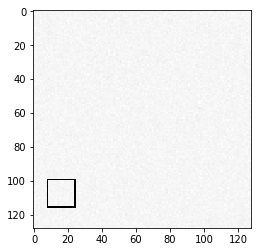

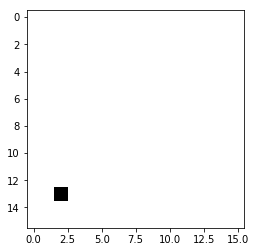

In [114]:
def getDataNoisy():
    rf=16
    width_i=128
    width_o=width_i//8
    x_train=[]
    y_train=[]
    for i in range(10):
        x=np.random.randn(width_i,width_i,1)
        y=np.abs(np.random.randn(width_o,width_o,1))
        x_train.append(x)
        y_train.append(y/np.max(y))
    return np.array(x_train),np.array(y_train)
def getAABB(height,width):
    rf=16
    y=random.randint(0,height-1-rf)
    x=random.randint(0, width-1-rf)
    return x,y,rf,rf
def drawAABB(img,aabb):
    x,y,w,h=aabb
    cv2.rectangle(img,(x,y),(x+w,y+h),(1,1,1))
    return img
def getData():
    width_i=128
    width_o=width_i//8
    x_train=[]
    y_train=[]
    for i in range(5000):
        x=np.random.randn(width_i,width_i,1)/100
        aabb=getAABB(width_i,width_i)
        x=drawAABB(x,aabb)
        y=np.zeros((width_o,width_o,1))
        y[aabb[1]//8+1,aabb[0]//8+1,0]=1
        y_train.append(y)
        x_train.append(x)
    return np.array(x_train),np.array(y_train)
x_train,y_train=getData()
print(x_train[0].shape)
print(y_train.shape)
print(np.min(y_train),np.max(y_train))
plt.imshow(x_train[0].reshape(128,128),cmap="gray_r")
plt.show()
plt.imshow(y_train[0].reshape(16,16),cmap="gray_r")
plt.show()

In [115]:
batch_size=500
epochs=25
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    nb_epoch=epochs,
                    verbose=1)

Epoch 1/25
5000/5000 [==============================] - 3s - loss: 0.3263 - acc: 0.9511     
Epoch 2/25
5000/5000 [==============================] - 3s - loss: 0.0593 - acc: 0.9961     
Epoch 3/25
5000/5000 [==============================] - 3s - loss: 0.0437 - acc: 0.9961     
Epoch 4/25
5000/5000 [==============================] - 3s - loss: 0.0330 - acc: 0.9961     
Epoch 5/25
5000/5000 [==============================] - 3s - loss: 0.0244 - acc: 0.9961     
Epoch 6/25
5000/5000 [==============================] - 3s - loss: 0.0159 - acc: 0.9961     
Epoch 7/25
5000/5000 [==============================] - 3s - loss: 0.0111 - acc: 0.9961     
Epoch 8/25
5000/5000 [==============================] - 3s - loss: 0.0092 - acc: 0.9963     
Epoch 9/25
5000/5000 [==============================] - 3s - loss: 0.0083 - acc: 0.9965     
Epoch 10/25
5000/5000 [==============================] - 3s - loss: 0.0075 - acc: 0.9967     
Epoch 11/25
5000/5000 [==============================] - 3s - loss: 0

In [116]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.00038120162175
Test accuracy: 0.99994921875


0.00135104474612
1.58842616923e-05


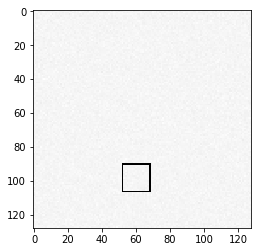

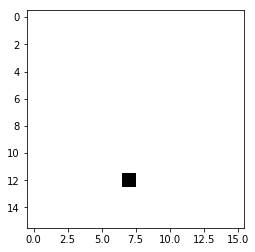

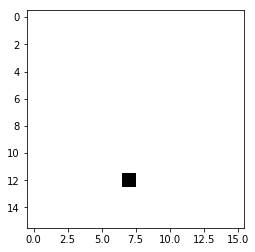

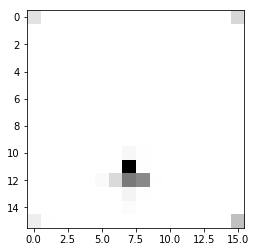

In [117]:
idx=random.randint(0,1000)
y_pred=model.predict(x_train)
y_dif=np.abs(y_pred-y_train)
print(np.max(y_dif[idx]))
print(np.sum(y_dif[idx]/(16*16)))
plt.imshow(x_train[idx].reshape(128,128),cmap="gray_r")
plt.show()
plt.imshow(y_train[idx].reshape(16,16),cmap="gray_r")
plt.show()
plt.imshow(y_pred[idx].reshape(16,16),cmap="gray_r")
plt.show()
plt.imshow(y_dif[idx].reshape(16,16),cmap="gray_r")
plt.show()
